In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.24 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
from agent import Agent
from collections import deque
from utils import save_model, load_model

import numpy as np
import matplotlib.pyplot as plt
import random
import torch

In [3]:
env = UnityEnvironment(file_name='/data/Banana_Linux_NoVis/Banana.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
agent = Agent(state_size=37, action_size=4, seed=0)

## Load model

In [5]:
load_model(agent.qnetwork_local, 'checkpoint.pth')

## Train model

In [6]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for i_episode in range(n_episodes):
        state = env.reset(train_mode=True)[brain_name]
        state = state.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = (int)(agent.act(state, eps))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score+=reward
            if done:
                break
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window)}', end="")
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window)}', end="")
            save_model(agent.qnetwork_local, i_episode)
        if np.mean(scores_window)>=15.0:
            print(f'\nEnvironment solved in {i_episode-100} episodes!\tAverage Score: {np.mean(scores_window)}')
            torch.save(agent.qnetwork_local.state_dict(), 'qnetwork.pth')
            break
    return scores

# Train Network 

In [7]:
train_scores = dqn()

Episode 692	Average Score: 15.05   model saved: episode 600 checkpoint file: checkpoint.pth
Environment solved in 592 episodes!	Average Score: 15.05


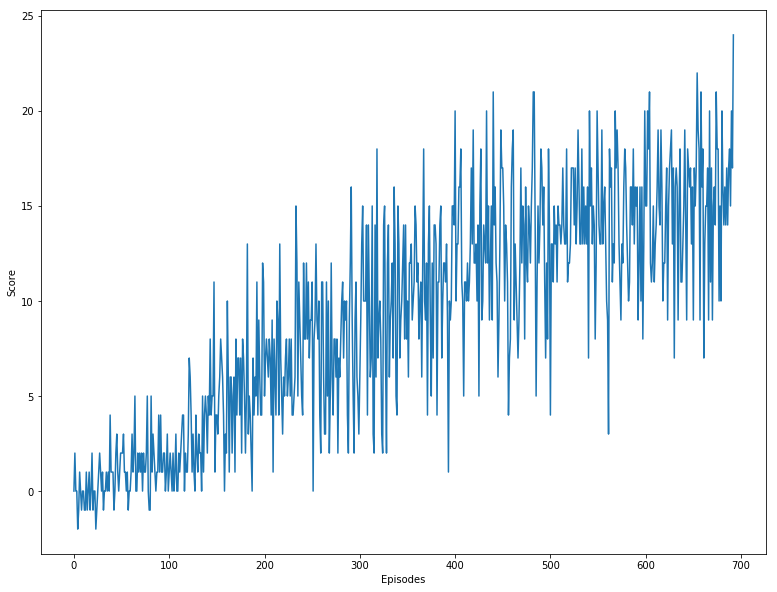

In [8]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(train_scores)), train_scores)
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

# Test Network

In [12]:
load_model(agent.qnetwork_local, 'qnetwork.pth')

state = env.reset(train_mode=False)[brain_name]
state = state.vector_observations[0]
score = 0

while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score+=reward
    state = next_state
    if done: break

print('Score:', score)

Score: 13.0
